In [2]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
import cellrank as cr
import anndata as ad
from cellrank.kernels import ConnectivityKernel, VelocityKernel
from cellrank.estimators import GPCCA
from tueplots import bundles
from tueplots import axes

In [3]:
cr.logging.print_versions()

cellrank==1.5.1+g16069e25 scanpy==1.9.1 anndata==0.8.0 numpy==1.23.5 numba==0.56.4 scipy==1.10.0 pandas==1.5.2 pygpcca==1.0.4 scikit-learn==1.2.0 statsmodels==0.13.5 scvelo==0.2.5 pygam==0.8.0 matplotlib==3.6.2 seaborn==0.12.2


In [4]:
org_adata = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/gastrulation/adata_gastrulation.h5ad")
org_adata.obs['celltype'].unique()

['Epiblast', 'Primitive Streak', 'Visceral endoderm', 'Nascent mesoderm', 'Rostral neurectoderm', ..., 'Cardiomyocytes', 'Erythroid2', 'NMP', 'Erythroid3', 'Neural crest']
Length: 34
Categories (34, object): ['Allantois', 'Anterior Primitive Streak', 'Blood progenitors 1', 'Blood progenitors 2', ..., 'Somitic mesoderm', 'Spinal cord', 'Surface ectoderm', 'Visceral endoderm']

In [5]:
leave_out = ['E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0']
adata = org_adata[~org_adata.obs["stage"].isin(leave_out)].copy()

map_dict = {"E6.5": 6.5, "E6.75": 6.75, "E7.0": 7.0, "E7.25": 7.25, "E7.5": 7.5, "E7.75": 7.75, "E8.0": 8.0,
            "E8.25": 8.25, "E8.5": 8.5}
adata.obs["stage"] = adata.obs["stage"].copy().map(map_dict)

adata.obs = adata.obs.loc[:, ['stage', 'celltype']]
adata.var = adata.var[[]]

sc.pp.log1p(adata)
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes=2000)

Filtered out 44276 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


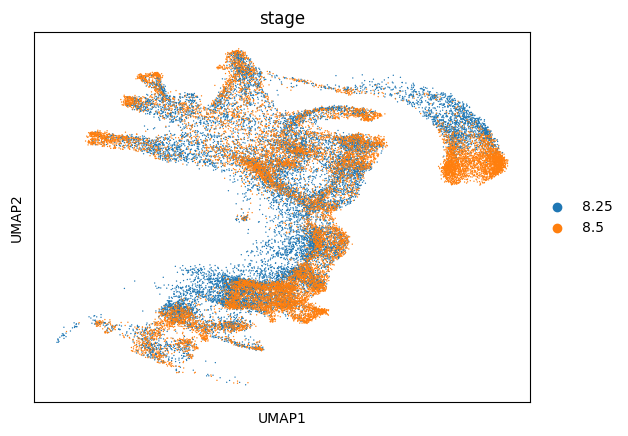

In [6]:
sc.pl.umap(adata, color = 'stage')

/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


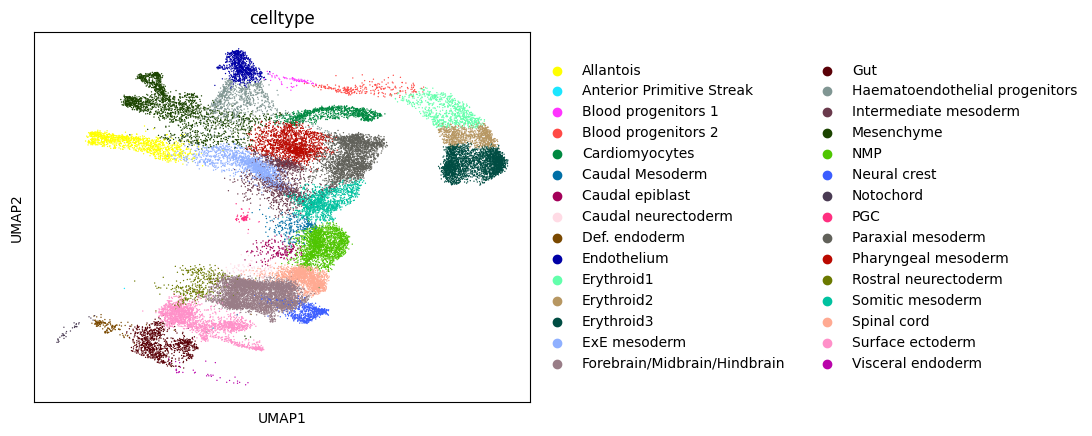

In [7]:
sc.pl.umap(adata, color = 'celltype')

In [8]:
adata_825 = adata[adata.obs['stage'] == 8.25, :].copy()
adata_85 = adata[adata.obs['stage'] == 8.5, :].copy()

In [9]:
sc.pp.pca(adata_825, n_comps=50)
scv.pp.moments(adata_825)
scv.tl.recover_dynamics(adata_825, n_jobs=80)
scv.tl.velocity(adata_825, mode = 'dynamical')

computing neighbors
    finished (0:00:29) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 80/96 cores)
or disable the progress bar using `show_progress_bar=False`.


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserW

    finished (0:31:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:18) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [10]:
sc.pp.pca(adata_85, n_comps=50)
scv.pp.moments(adata_85)
scv.tl.recover_dynamics(adata_85, n_jobs=80)
scv.tl.velocity(adata_85, mode = 'dynamical')

computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 80/96 cores)


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserW

    finished (0:33:36) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:21) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
adata = ad.concat([adata_825, adata_85])
sc.pp.pca(adata, n_comps = 50)
sc.pp.neighbors(adata)
adata.obs['celltype'].unique()

array(['ExE mesoderm', 'Pharyngeal mesoderm',
       'Forebrain/Midbrain/Hindbrain', 'Paraxial mesoderm',
       'Surface ectoderm', 'Erythroid1', 'Cardiomyocytes',
       'Intermediate mesoderm', 'Haematoendothelial progenitors', 'Gut',
       'Endothelium', 'Somitic mesoderm', 'NMP', 'Spinal cord',
       'Caudal Mesoderm', 'Mesenchyme', 'Rostral neurectoderm',
       'Neural crest', 'Allantois', 'Erythroid2', 'Caudal epiblast',
       'Blood progenitors 1', 'Erythroid3', 'Caudal neurectoderm',
       'Blood progenitors 2', 'PGC', 'Def. endoderm',
       'Anterior Primitive Streak', 'Visceral endoderm', 'Notochord'],
      dtype=object)

In [12]:
vk = VelocityKernel(adata).compute_transition_matrix()

100%|██████████████████████████████████████████████████████████████████████████| 31403/31403 [00:40<00:00, 776.77cell/s]


In [ ]:
g = GPCCA(vk)
g.compute_schur(n_components=20)
g.plot_spectrum(real_only=True)

In [15]:
g.compute_macrostates(n_states=8, cluster_key="celltype")
scv.set_figure_params('scvel o', transparent=True, fontsize=20, color_map='viridis')
g.plot_macrostates(discrete=True, basis="umap", legend_loc="right", legend_fontweight='normal', legend_fontsize='12', dpi=250)

AttributeError: Can only use .cat accessor with a 'category' dtype

In [ ]:
g.set_terminal_states_from_macrostates(
    [
        "Acinar", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", 
    ]
)
g.compute_absorption_probabilities(solver="gmres", use_petsc=True, tol=1e-12, preconditioner='ilu', time_to_absorption='all')
g.plot_absorption_probabilities(same_plot=False, basis="umap", perc=[0, 99], ncols=2)

In [ ]:
scv.set_figure_params('scvelo', transparent=True, fontsize=20, color_map='viridis')
cr.pl.aggregate_absorption_probabilities(
    adata,
    mode='heatmap',
    lineages=["Acinar", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", ],
    cluster_key='celltype',
    clusters=['Acinar', 'Multipotent', 'Tip', 'Ductal', 'Ngn3 High early', 'Ngn3 High late', 'Fev+ Alpha', 'Alpha', 'Fev+ Beta', 'Beta', 'Fev+ Delta', 'Delta', 'Fev+ Epsilon', 'Epsilon'],
    figsize=(17, 6),
    title="",
    save="transprobs_pancreas1415_scvelo.png"
)

In [ ]:
adata.uns["velocity_graph"] = vk.transition_matrix

scv.set_figure_params('scvelo', transparent=True, fontsize=10, dpi_save=400,color_map='viridis')
fig = plt.figure()
ax = scv.pl.velocity_embedding_stream(adata, basis="umap", smooth=0.5, title="", legend_loc="none", show=False)
legend =ax.legend(bbox_to_anchor=[1.25, 1.5], loc='upper center', ncol=6,frameon=True, prop={'size': 18})

In [ ]:
scv.tl.velocity_confidence(adata)

In [ ]:
scv.set_figure_params('scvelo', fontsize=20)
scv.settings.presenter_view = False
scv.pl.scatter(adata, color='velocity_confidence',
               perc=[2, 98],
               cmap='gnuplot',
               vmid=0.75,
               rescale_color=[0.5, 1.0],
               size=15,
               title="",
               #save="velconf_pancreas1415_scvelo.png"
              )

## Old version below

In [3]:
adata825 = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/gastrulation/stage_825_growth_rate.h5ad")
adata85 = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/gastrulation/stage_85_growth_rate.h5ad")
adata = ad.concat([adata825, adata85], merge="same")

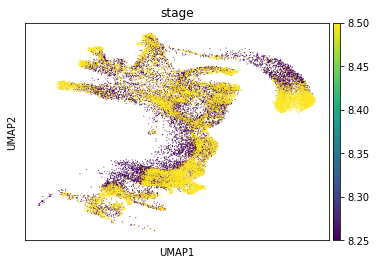

In [4]:
sc.pl.umap(adata, color='stage')

In [5]:
sc.pp.neighbors(adata)

In [6]:
sc.tl.umap(adata)

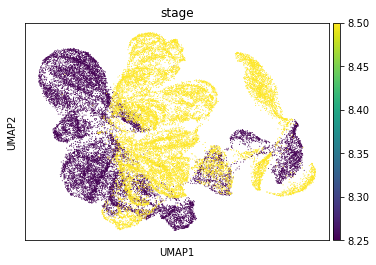

In [7]:
sc.pl.umap(adata, color='stage')

/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


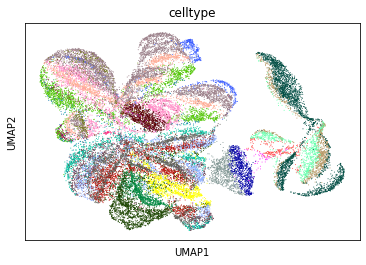

In [8]:
sc.pl.umap(adata, color='celltype', legend_loc=None)

In [9]:
adata.obs = adata.obs.loc[:, ['stage', 'celltype']]
adata.var = adata.var[['highly_variable']]

In [10]:
adata_825 = adata[adata.obs['stage'] == 8.25, :].copy()
adata_85 = adata[adata.obs['stage'] == 8.5, :].copy()

In [11]:
scv.pp.pca(adata_825, n_comps=50)
scv.pp.pca(adata_85, n_comps=50)
scv.pp.moments(adata_825)
scv.pp.moments(adata_85)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:12) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:14) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
scv.tl.recover_dynamics(adata_825, n_jobs=10)

recovering dynamics (using 10/96 cores)


  0%|          | 0/870 [00:00<?, ?gene/s]

/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserW

    finished (0:19:48) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [13]:
scv.tl.velocity(adata_825, mode='dynamical')

computing velocities
    finished (0:00:15) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [14]:
scv.tl.recover_dynamics(adata_85, n_jobs=10)
scv.tl.velocity(adata_85, mode='dynamical')

recovering dynamics (using 10/96 cores)


  0%|          | 0/870 [00:00<?, ?gene/s]

/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

Concatenate timepoints

In [ ]:
adata = ad.concat([adata_825, adata_85])

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [19]:
#sc.set_figure_params('scvelo', transparent=True, fontsize=10, color_map='viridis')
sc.pl.scatter(adata,  color='stage')

ValueError: Either provide a `basis` or `x` and `y`.

In [ ]:
sc.pl.umap(adata, color='stage')

In [ ]:
sc.pl.umap(adata, color='celltype', legend_loc=None)

In [ ]:
vk = VelocityKernel(adata).compute_transition_matrix()

Macrostate calculation

In [ ]:
g = GPCCA(vk)

In [ ]:
g.compute_schur(n_components=20)
g.plot_spectrum(real_only=True)

In [ ]:
g.compute_macrostates(n_states=8, cluster_key="celltype")
scv.set_figure_params('scvel o', transparent=True, fontsize=20, color_map='viridis')
g.plot_macrostates(discrete=True, basis="umap", legend_loc="right", legend_fontweight='normal', legend_fontsize='12', dpi=250)

Fate probabilities

In [ ]:
g.set_terminal_states_from_macrostates(
    [
        "Acinar", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", #celltypes pancreas, CHANGE!
    ]
)
g.compute_absorption_probabilities(solver="gmres", use_petsc=True, tol=1e-12, preconditioner='ilu', time_to_absorption='all')
g.plot_absorption_probabilities(same_plot=False, basis="umap", perc=[0, 99], ncols=2)

In [ ]:

scv.set_figure_params('scvelo', transparent=True, fontsize=20, color_map='viridis')
cr.pl.aggregate_absorption_probabilities(
    adata,
    mode='heatmap',
    lineages=["Acinar", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", ],
    cluster_key='celltype',
    clusters=['Acinar', 'Multipotent', 'Tip', 'Ductal', 'Ngn3 High early', 'Ngn3 High late', 'Fev+ Alpha', 'Alpha', 'Fev+ Beta', 'Beta', 'Fev+ Delta', 'Delta', 'Fev+ Epsilon', 'Epsilon'],
    figsize=(17, 6),
    title="",
    save="transprobs_pancreas1415_scvelo.png"
)

Velocity Stream Plot

In [ ]:
adata.uns["velocity_graph"] = vk.transition_matrix

scv.set_figure_params('scvelo', transparent=True, fontsize=10, dpi_save=400,color_map='viridis')
fig = plt.figure()
ax = scv.pl.velocity_embedding_stream(adata, basis="umap", smooth=0.5, title="", legend_loc="none", show=False)
legend =ax.legend(bbox_to_anchor=[1.25, 1.5], loc='upper center', ncol=6,frameon=True, prop={'size': 18})
#plt.savefig("velstream_pancreas1415_scvelo", dpi=800, bbox_inches='tight')

In [ ]:
scv.tl.velocity_confidence(adata)

In [ ]:
scv.set_figure_params('scvelo', fontsize=20)
scv.settings.presenter_view = False
scv.pl.scatter(adata, color='velocity_confidence',
               perc=[2, 98],
               cmap='gnuplot',
               vmid=0.75,
               rescale_color=[0.5, 1.0],
               size=15,
               title="",
               #save="velconf_pancreas1415_scvelo.png"
            )